# Analyzing 911 Calls for Montgomery County, PA

For this project, I have analyzed some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [4]:
#Importing numpy and pandas
import numpy as np
import pandas as pd

In [3]:
#Importing Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# Read the csv file with pandas
df = pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
#Lets check the head of df
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [9]:
# Q.What are the top 5 zipcodes for 911 calls?
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
#Q. What are the top 5 townships for 911 calls?
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
#Q. How many unique title codes are there?
df['title'].nunique()

110

In [12]:
# CREATING NEW FEATURES
# In the title column, we have 'Reasons/Departments' specified (as single string). Lets create a new Reason Column

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [13]:
#Q. What is the most common reason for a 911 call?
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

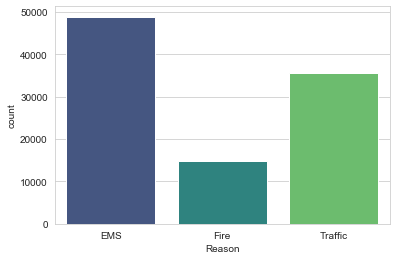

In [14]:
# Lets create a countplot of 911 calls by Reason using seaborn
sns.countplot(x='Reason',data=df,palette='viridis')

In [15]:
# Now let us begin to focus on time information.
# Lets check the datatype of the objects in the timeStamp column
type(df['timeStamp'].iloc[0])

str

In [16]:
# Converting the timeStamp column from strings to DateTime object.
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
# Now lets create 3 new columns calles Hour, Month and Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [19]:
# Again checking the head of df
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


In [20]:
#The Day of Week is an integer, so lets convert this to actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

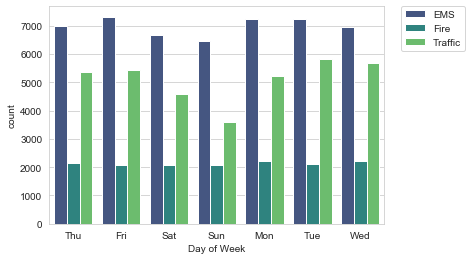

In [21]:
# Countplot of the Day of Week column with the hue based off the reason column
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

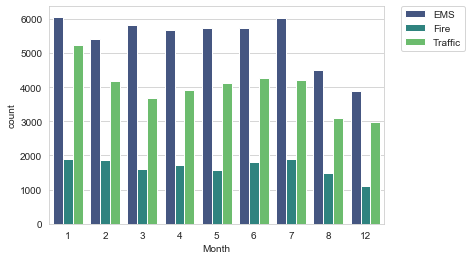

In [22]:
# Now we do same for Month
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [42]:
# It is missing some months! 9,10, and 11 are not there.

*We can notice something strange over here that its missing some Months (9,10 and 11).
Let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months*

In [23]:
# Creating a groupby object byMonth
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


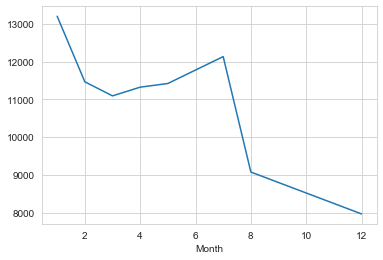

In [24]:
# Creating a simple plot off the dataframe indicating the count of calls per month
byMonth['twp'].plot()

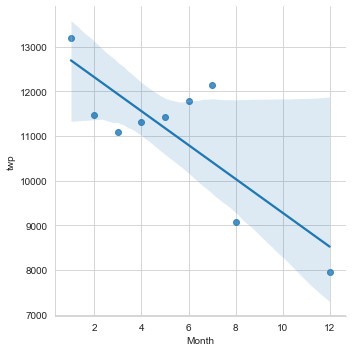

In [25]:
# Using seaborn to create a linear fit on the number of calls per month.
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [26]:
# Lets create a new column called 'Date' that contains the date from the timeStamp column
df['Date']=df['timeStamp'].apply(lambda t: t.date())

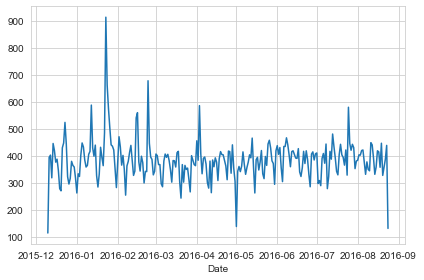

In [27]:
# Using groupby with this Date column with count() aggregate and creating a plot of counts of 911 calls
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

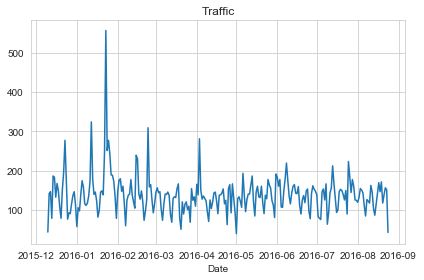

In [28]:
# Aggregate calls for Reason == Traffic
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

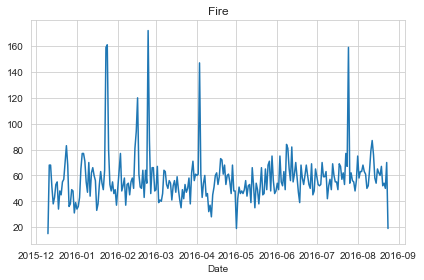

In [29]:
# Aggregate calls for Reason == Fire
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

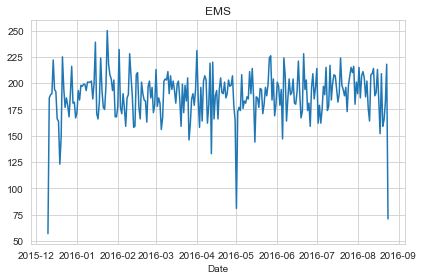

In [32]:
# Aggregate calls for Reason == EMS
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [33]:
# Now lets create heatmaps with seaborn and try to analyze the data furthure.

In [34]:
# I'll first need to restructure the dataframe so that columns becomes the Hour and Index becomes the Day of the week.

dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


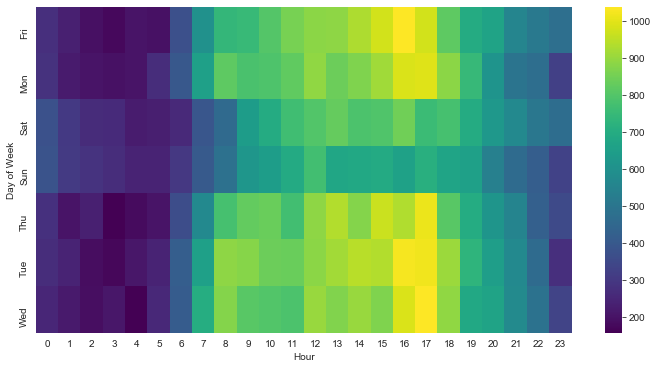

In [35]:
# Creating HeatMap using this new DataFrame
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

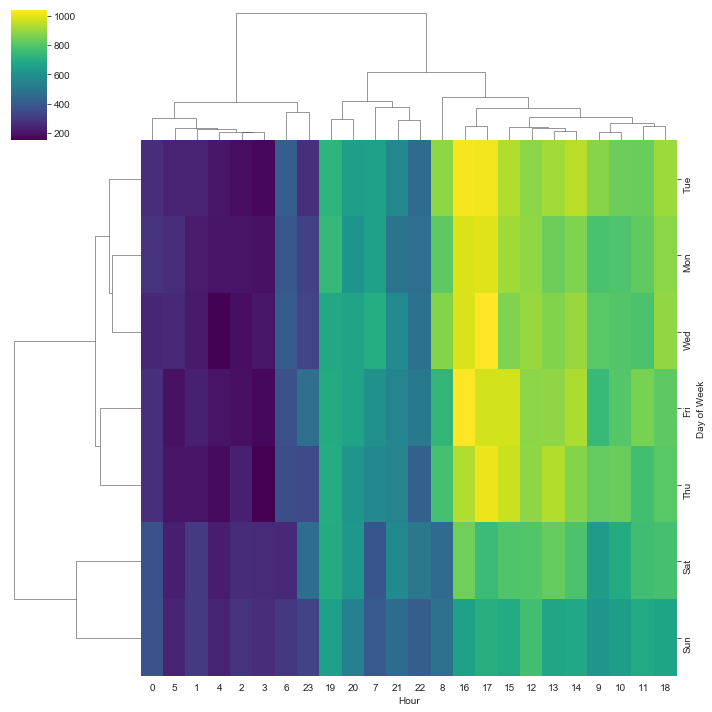

In [36]:
# Clustermap
sns.clustermap(dayHour,cmap='viridis')

In [37]:
# For DataFrame that shows the Month as the column
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


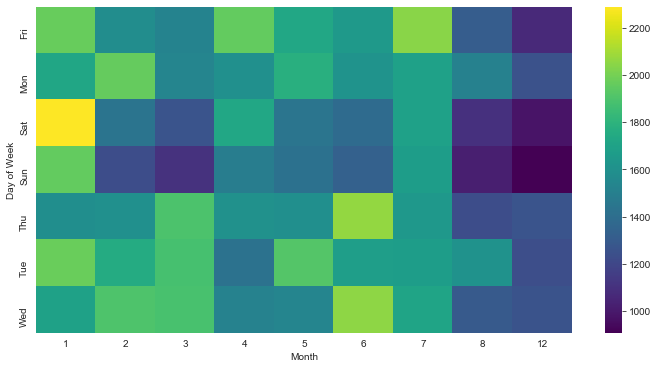

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

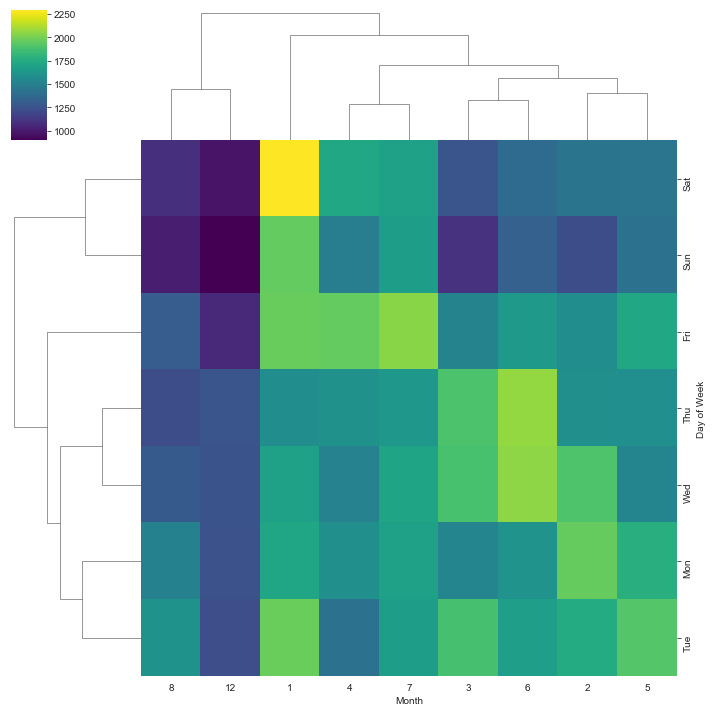

In [39]:
sns.clustermap(dayMonth,cmap='viridis')